<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN_Project-Image_Classification_with_CNN_(catdogclassifier)/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [5]:
my_data_dir = "data"

In [6]:
os.listdir(my_data_dir)

['validation', 'test', 'train']

In [7]:
test_path = my_data_dir+'/test'
train_path = my_data_dir+"/train"
validation_path = my_data_dir+"/validation"

In [8]:
os.listdir(train_path)

['dog', 'cat']

**Let's check how many images there are.**

In [9]:
#number of cat images in train set
len(os.listdir(train_path+'/cat'))

12500

In [10]:
#number of dog images in train set
len(os.listdir(train_path+'/dog'))

5026

**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [11]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes
cat_zero = os.listdir(train_path+'/cat')[0]
dog_one = os.listdir(train_path+'/dog')[1]

In [12]:
dog = imread(train_path+'/dog/'+ dog_one)
dog 

array([[[205, 166, 127],
        [205, 166, 127],
        [205, 166, 127],
        ...,
        [205, 166, 127],
        [205, 166, 127],
        [205, 166, 127]],

       [[205, 166, 127],
        [205, 166, 127],
        [205, 166, 127],
        ...,
        [205, 166, 127],
        [205, 166, 127],
        [205, 166, 127]],

       [[205, 166, 127],
        [205, 166, 127],
        [205, 166, 127],
        ...,
        [205, 166, 127],
        [205, 166, 127],
        [205, 166, 127]],

       ...,

       [[135, 122, 103],
        [135, 122, 103],
        [135, 122, 103],
        ...,
        [135, 122, 103],
        [135, 122, 103],
        [135, 122, 103]],

       [[135, 122, 103],
        [135, 122, 103],
        [135, 122, 103],
        ...,
        [135, 122, 103],
        [135, 122, 103],
        [135, 122, 103]],

       [[135, 122, 103],
        [135, 122, 103],
        [135, 122, 103],
        ...,
        [135, 122, 103],
        [135, 122, 103],
        [135, 122, 103]]

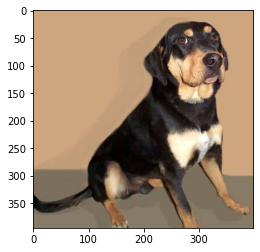

In [13]:
#show dog image
plt.imshow(dog)

In [14]:
cat = imread(train_path+'/cat/'+ cat_zero)
cat

array([[[30, 29, 43],
        [30, 30, 42],
        [30, 30, 40],
        ...,
        [ 3,  5,  2],
        [ 3,  5,  2],
        [ 3,  5,  2]],

       [[34, 34, 46],
        [34, 34, 44],
        [33, 33, 41],
        ...,
        [ 4,  6,  3],
        [ 4,  6,  3],
        [ 4,  6,  3]],

       [[39, 38, 46],
        [39, 38, 46],
        [39, 38, 44],
        ...,
        [ 5,  7,  4],
        [ 5,  7,  4],
        [ 5,  7,  4]],

       ...,

       [[18, 20, 17],
        [18, 20, 17],
        [19, 21, 18],
        ...,
        [43, 23, 16],
        [43, 23, 16],
        [43, 23, 16]],

       [[18, 20, 17],
        [18, 20, 17],
        [18, 20, 17],
        ...,
        [49, 18, 15],
        [49, 18, 15],
        [49, 18, 15]],

       [[17, 19, 16],
        [17, 19, 16],
        [18, 20, 17],
        ...,
        [52, 17, 15],
        [52, 17, 15],
        [52, 17, 15]]], dtype=uint8)

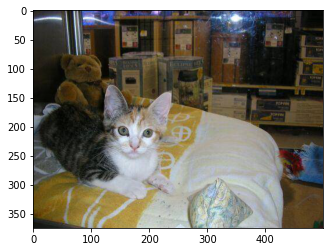

In [15]:
#show cat image
plt.imshow(cat)

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [16]:
dog.shape

(395, 400, 3)

In [17]:
cat.shape

(375, 499, 3)

In [41]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [45]:
dog.max()

255

In [43]:
cat.max()

255

In [46]:
dog = dog.astype('float32')
cat = cat.astype('float32')
dog /= 255
cat /= 255

In [47]:
cat.max()

1.0

In [48]:
dog.max()

1.0

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
image_gen = ImageDataGenerator(rotation_range=20, # randomly rotate images in the range (degrees, 0 to 180)
                               width_shift_range=0.10, # randomly shift images horizontally (fraction of total width)
                               height_shift_range=0.10, # randomly shift images vertically (fraction of total height)
                               rescale=1/255, # divide all values by 255.
                               shear_range=0.1, # apply shearing in the range (radians, -pi/2 to pi/2)
                               zoom_range=0.1, # apply scaling in the range (1-zoom_range to 1+zoom_range)
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill any empty pixels with the nearest pixel
                              )

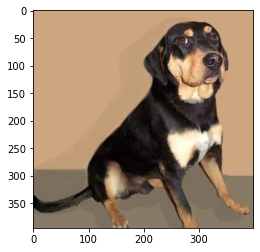

In [51]:
plt.imshow(dog)

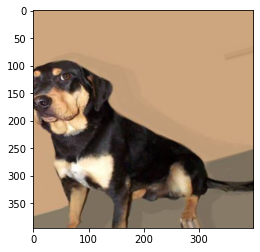

In [52]:
#show transfromed version of dog image
plt.imshow(image_gen.random_transform(dog)) # random_transform() is a method of ImageDataGenerator class

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [53]:
image_gen.flow_from_directory(validation_path) #validation_path is a directory

Found 2290 images belonging to 2 classes.


In [54]:
image_gen.flow_from_directory(train_path) #train_path is a directory

Found 17526 images belonging to 2 classes.


In [55]:
image_gen.flow_from_directory(test_path) # test_path is not a directory

Found 0 images belonging to 0 classes.


# Modelling

In [56]:
#create your CNN model here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [57]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',)) # image_shape = (128,128,3) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
model.summary() #check the summary of your model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
## Early Stopping

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop =  EarlyStopping(monitor='val_loss', patience=3) # patience = 3 is the number of epochs to wait before early stopping

In [61]:
batch_size = 10 # batch size is the number of images to feed the model at a time   

In [ ]:
#use image_gen from above and read images from train and test set

In [62]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 17526 images belonging to 2 classes.


In [63]:
val_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False) # shuffle = False is important for test and validation set

Found 2290 images belonging to 2 classes.


In [64]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False) # shuffle = False is important for test and validation set

Found 0 images belonging to 0 classes.


In [65]:
#show class indices in train set
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
## Model Training

In [67]:

import warnings                             # ignore warnings
warnings.filterwarnings('ignore')

In [68]:
results = model.fit_generator(train_image_gen,epochs=15 ,                               #fit your model using train and validation set
                              validation_data=val_image_gen, callbacks=[early_stop]) 

Epoch 1/15
1753/1753 [==============================] - 159s 84ms/step - loss: 0.5987 - accuracy: 0.7130 - val_loss: 0.7315 - val_accuracy: 0.5328
Epoch 2/15
1753/1753 [==============================] - 150s 86ms/step - loss: 0.5666 - accuracy: 0.7202 - val_loss: 0.6639 - val_accuracy: 0.6074
Epoch 3/15
1753/1753 [==============================] - 130s 74ms/step - loss: 0.5254 - accuracy: 0.7458 - val_loss: 0.6247 - val_accuracy: 0.6629
Epoch 4/15
1753/1753 [==============================] - 130s 74ms/step - loss: 0.4897 - accuracy: 0.7722 - val_loss: 0.5869 - val_accuracy: 0.7166
Epoch 5/15
1753/1753 [==============================] - 127s 73ms/step - loss: 0.4686 - accuracy: 0.7823 - val_loss: 0.5859 - val_accuracy: 0.6729
Epoch 6/15
1753/1753 [==============================] - 129s 74ms/step - loss: 0.4393 - accuracy: 0.8024 - val_loss: 0.5825 - val_accuracy: 0.7092
Epoch 7/15
1753/1753 [==============================] - 129s 74ms/step - loss: 0.4211 - accuracy: 0.8099 - val_loss: 0

# Evaluation on Test Data

In [70]:
losses = pd.DataFrame(model.history.history)   # create a dataframe of your model history
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.598665,0.712998,0.731462,0.532751
1,0.566612,0.720187,0.663921,0.607424
2,0.525379,0.745806,0.624745,0.662882
3,0.489692,0.772167,0.586948,0.716594
4,0.468637,0.782323,0.585919,0.672926


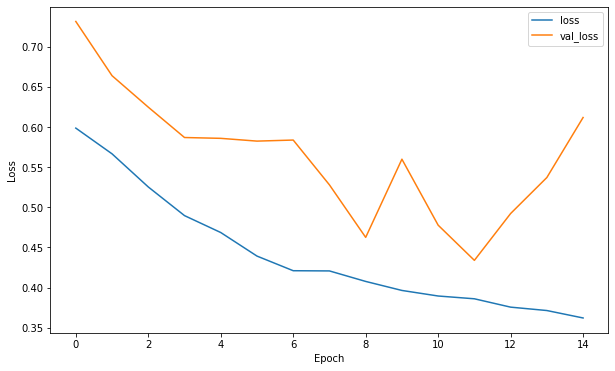

In [71]:
plt.figure(figsize=(10,6))                       # plot the loss of your model
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

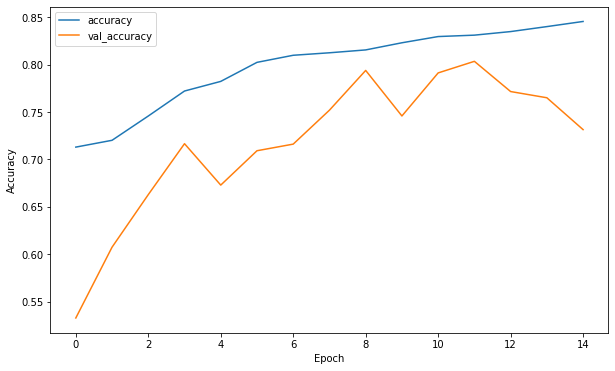

In [72]:
plt.figure(figsize=(10,6))                       # plot the accuracy of your model
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [73]:
model.metrics_names

['loss', 'accuracy']

In [74]:
model.evaluate_generator(val_image_gen)

[0.5972568988800049, 0.7257642149925232]

In [75]:
pred_probabilities = model.predict_generator(val_image_gen)

In [76]:
pred_probabilities

array([[0.00809739],
       [0.13744949],
       [0.20873818],
       ...,
       [0.9227348 ],
       [0.8732145 ],
       [0.9318821 ]], dtype=float32)

In [77]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [78]:
predictions = pred_probabilities > 0.5

In [79]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79      1219
           1       0.93      0.44      0.60      1071

    accuracy                           0.72      2290
   macro avg       0.80      0.71      0.69      2290
weighted avg       0.79      0.72      0.70      2290



In [82]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1186,   33],
       [ 599,  472]])

In [86]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Prediction

In [87]:
from PIL import Image
from tensorflow.keras.preprocessing import image

In [88]:
model=load_model('cat_dog_detector.h5') # load your model

In [90]:
#read 2749.jpg from test set
my_image = image.load_img(test_path+"/2749.jpg", target_size=image_shape)    # resize the image to 128x128
# res_my_image = my_image.resize(image_shape)

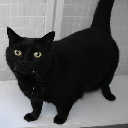

In [91]:
my_image

In [92]:
# turn the image into numpy array
my_image = image.img_to_array(my_image) # convert the image into numpy array
my_image.shape

(128, 128, 3)

In [93]:
#reshape it as below
res_my_image = np.expand_dims(my_image, axis=0) # add an extra dimension to the image
res_my_image.shape

(1, 128, 128, 3)

In [94]:
#predict the image class with your model
prediction = model.predict(res_my_image)
prediction

array([[0.]], dtype=float32)

In [95]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
image_shape =(128,128,3)

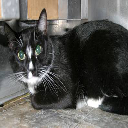

In [119]:
madcat = image.load_img(test_path+'/10021.jpg', target_size=(128,128,3))
madcat

In [120]:
madcat = np.expand_dims(madcat, axis=0) # add an extra dimension to the image
madcat.shape

(1, 128, 128, 3)

In [121]:
model.predict(madcat)

array([[0.]], dtype=float32)

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>